<a href="https://colab.research.google.com/github/danielmancovidales/Aplicaciones-en-salud/blob/main/d)sel_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
# Librerias generales
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
# Librerias e visualización
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [166]:
# Lectura de base de datos filtrado
from google.colab import drive
drive.mount('/content/drive')

numericas= pd.read_csv('/content/drive/MyDrive/analitica3/Salud/numericas.csv')
categoricas= pd.read_csv('/content/drive/MyDrive/analitica3/Salud/categoricas.csv')
y= pd.read_csv('/content/drive/MyDrive/analitica3/Salud/y.csv')

numericas.drop(['Unnamed: 0'],axis=1, inplace=True)
categoricas.drop(['Unnamed: 0'],axis=1, inplace=True)
y.drop(['Unnamed: 0'],axis=1, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Transformación de variables**

**Categóricas**

In [167]:
#Transformación variables categóricas
categorical_features = categoricas.columns
le = LabelEncoder()

for i in categorical_features:
    categoricas[i] = le.fit_transform(categoricas[i])

In [168]:
#Cambio a tipo int para poder graficar correlación
categoricas=categoricas.astype(int)

**Numéricas**

In [169]:
#Transformación variables numéricas
scaler = MinMaxScaler()
num_sc = scaler.fit_transform(numericas)

num_sc = pd.DataFrame(num_sc, columns=numericas.columns)

**Target**

In [170]:
#Transformación variable target
scaler = MinMaxScaler()
y_sc = scaler.fit_transform(y[['tiempo_estancia']])

# Convertir y_sc en un DataFrame
y_sc = pd.DataFrame(y_sc, columns=['tiempo_estancia'])

####**Correlaciones**

**Numéricas**

In [171]:
#Concatenación entre la variable target y numéricas
cor_num = pd.concat([y_sc, num_sc], axis=1)
cor_num

,tiempo_estancia,peso,talla,imc,saturacion_de_oxigeno_(%),presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca_en_reposo,mets_-indice_metabolico,vo2_-_maxima_cantidad_de_oxigeno,indice_de_fragilidad_groningen,glicemia,hemoglobina_glicada,lipoproteina,hdl,colesterol_total,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,microalbuminuria,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,cambio_de_tfg
0,0.033741,0.483871,0.413793,0.684632,0.727273,0.406897,0.1875,0.319588,0.235094,0.235095,0.133333,0.000000,0.072439,0.635347,0.352901,0.724271,0.140713,0.139059,0.082208,0.009098,0.206737,0.000000,0.332751
1,0.003575,0.204301,0.362069,0.315004,0.545455,0.344828,0.3750,0.371134,0.259376,0.259378,0.466667,0.000000,0.000000,0.000000,0.340458,0.494915,0.104392,0.124744,0.053463,0.000000,0.000000,0.134470,0.332751
2,0.131474,0.446237,0.448276,0.603423,0.545455,0.717241,0.4750,0.340206,0.078024,0.078024,0.133333,0.097292,0.049593,0.651287,0.331832,0.705424,0.100360,0.208589,0.039972,0.000893,0.089168,0.234848,0.338766
3,0.073257,0.258065,0.379310,0.383831,0.454545,0.489655,0.3500,0.701031,0.145373,0.145374,0.066667,0.000000,0.058130,0.301980,0.412214,0.477966,0.088553,0.104294,0.069530,0.002363,0.000000,0.000000,0.332751
4,0.039184,0.440860,0.551724,0.519665,0.454545,0.275862,0.3750,0.350515,0.144288,0.144287,0.533333,0.085256,0.052033,0.000000,0.438092,0.424407,0.060187,0.372188,0.022718,0.000582,0.218956,0.250000,0.316453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.027024,0.612903,0.517241,0.771668,0.909091,0.579310,0.4500,0.268041,0.156878,0.156878,0.133333,0.086259,0.047480,0.197277,0.357557,0.451864,0.083369,0.122699,0.112278,0.000059,0.021466,0.145833,0.360885
1291,0.039936,0.397849,0.603448,0.431173,0.727273,0.275862,0.3750,0.226804,0.332312,0.332313,0.666667,0.078235,0.046829,0.000000,0.488626,0.411186,0.032973,0.175869,0.037234,0.000019,0.040621,0.000000,0.332751
1292,0.020086,0.333333,0.431034,0.457757,0.545455,0.275862,0.2500,0.412371,0.404341,0.404340,0.533333,0.078235,0.049837,0.000000,0.256260,0.569492,0.086393,0.085890,0.104789,0.000141,0.022457,0.113636,0.332751
1293,0.002234,0.236559,0.344828,0.373999,0.636364,0.379310,0.3875,0.958763,0.175842,0.175842,0.800000,0.119358,0.055935,0.000000,0.353435,0.721356,0.069618,0.214724,0.035784,0.000111,0.715984,0.000000,0.332751


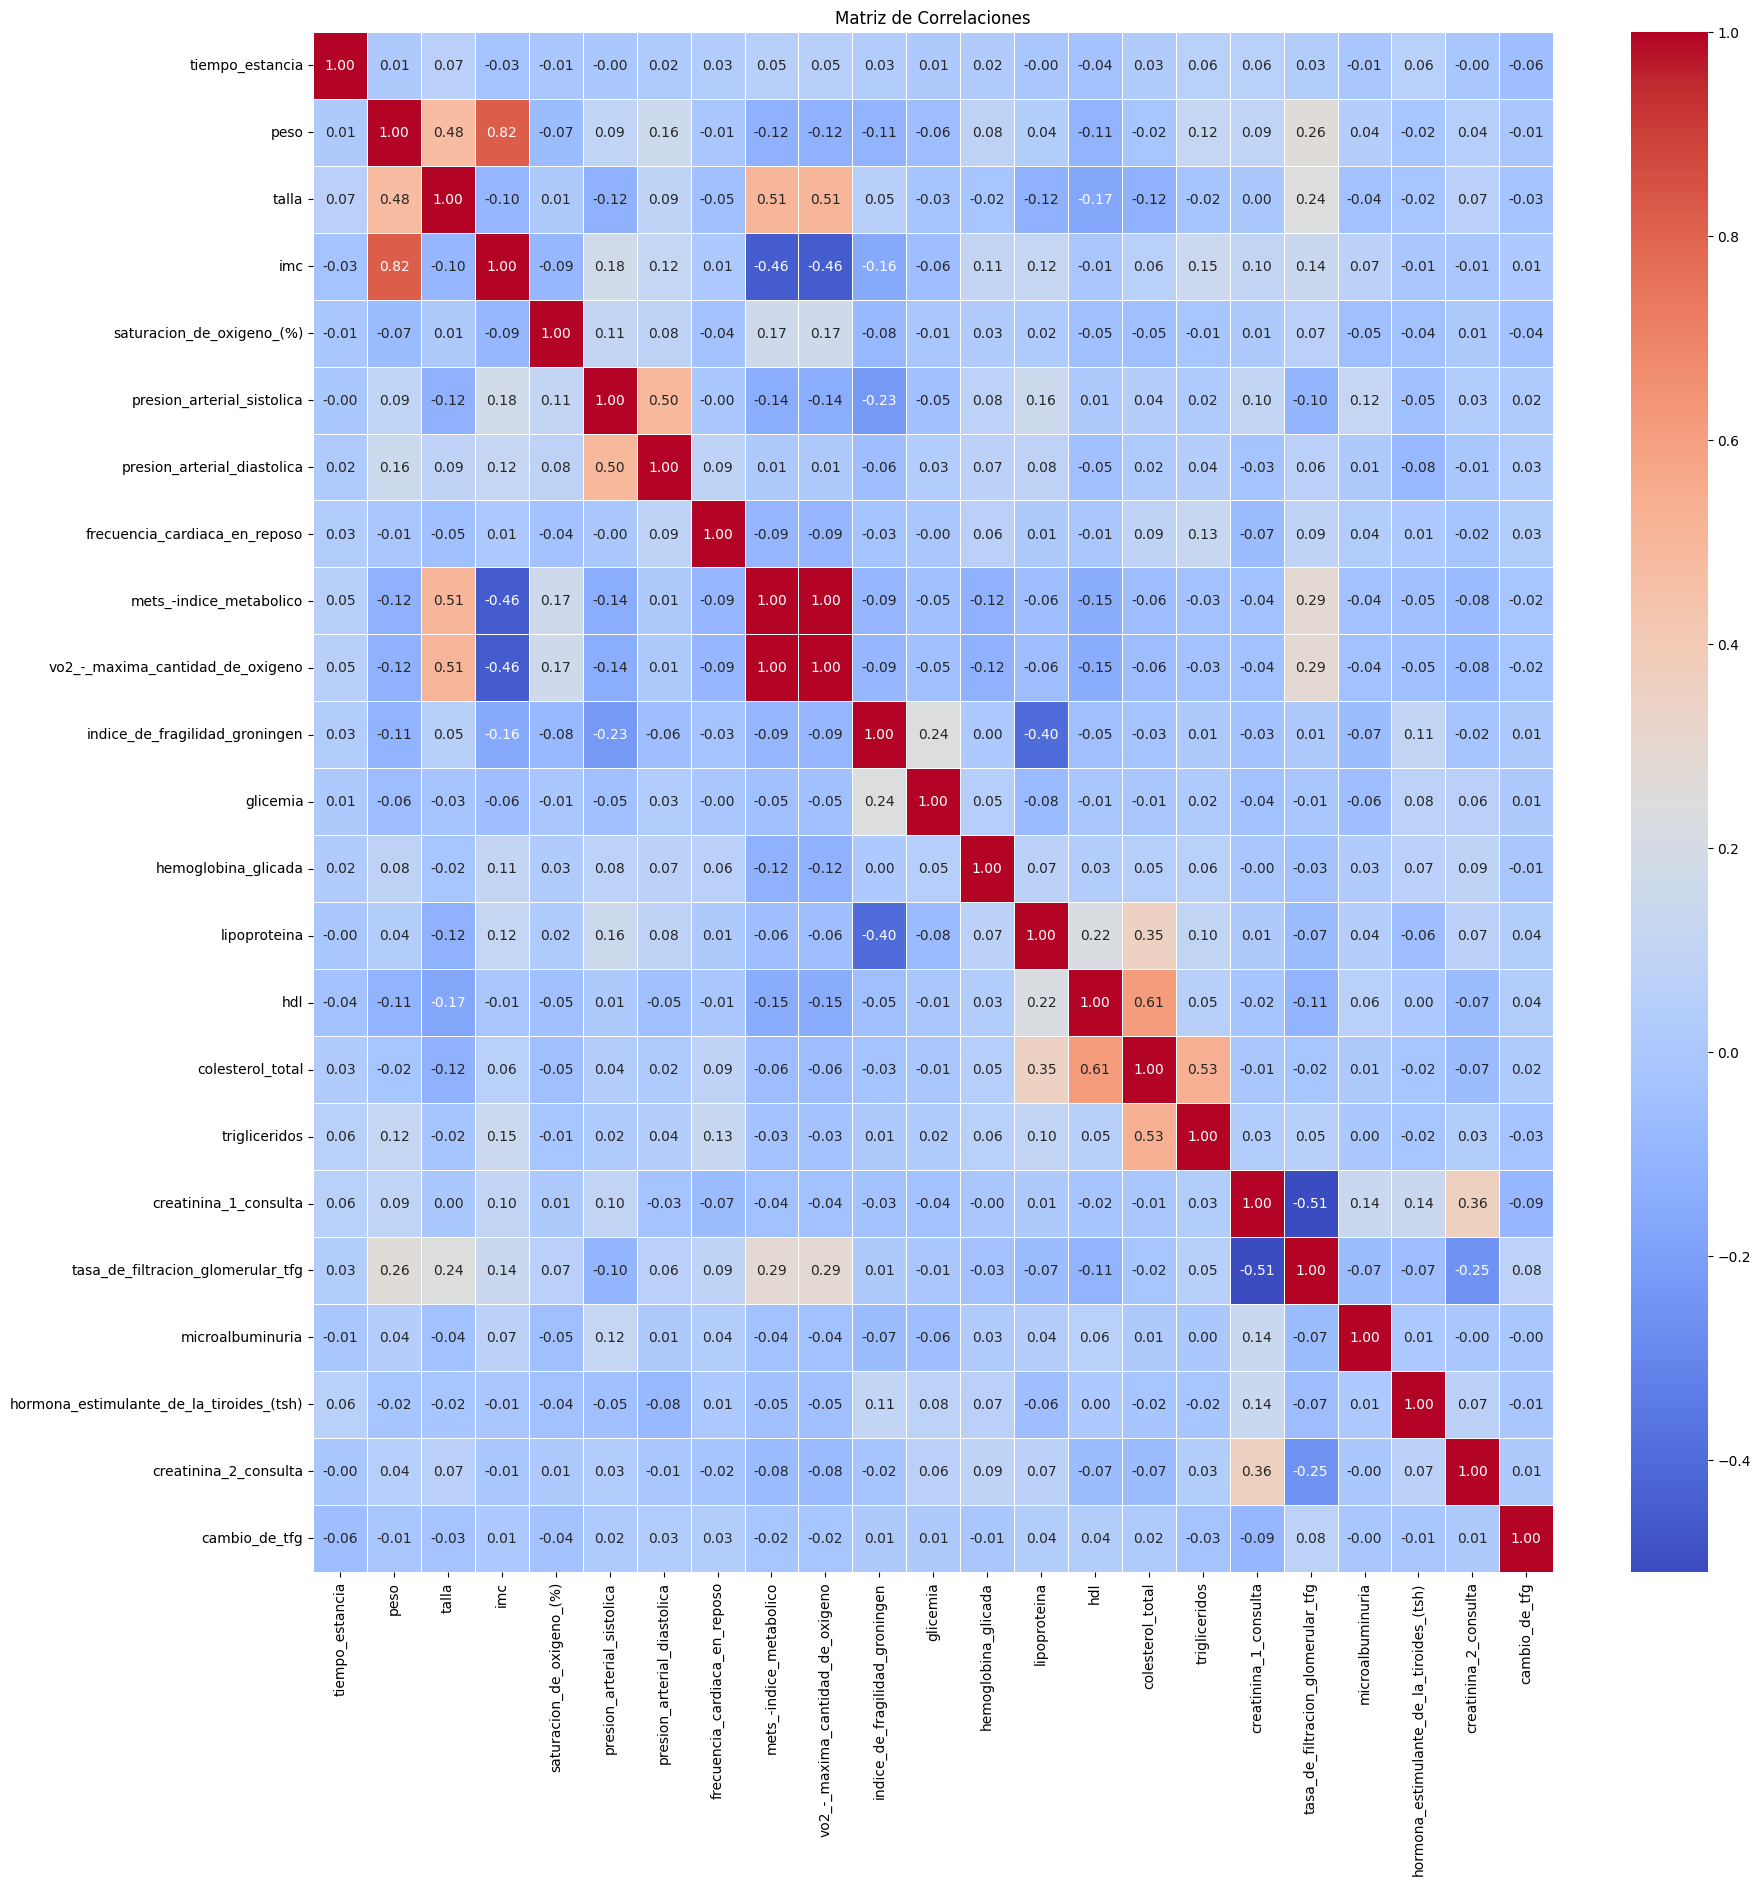

In [172]:
# Cálculo matriz de correlaciones
correlation_matrix = cor_num.corr()

# Creación de un mapa de calor (heatmap) para visualizar la matriz de correlaciones
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')

plt.show()

Se decide eliminar las variables creatinina_1_consulta, creatinina_2_consulta, hdl, imc y mets_-indice_metabolico por tener alta correlación con otras variables diferentes a la objetivo

In [173]:
#Eliminación
numericas = numericas.drop(["creatinina_1_consulta", "creatinina_2_consulta", "hdl", "mets_-indice_metabolico", "imc"], axis=1)

**Categóricas**

In [174]:
pd.set_option('display.max_columns', None)
cor_cat = pd.concat([y_sc, categoricas], axis=1)
cor_cat

,tiempo_estancia,year_egreso,mes_egreso,servicio_habilitado,nrodoc,modalidad_contrato,servicio_admite,via_ingreso,unidad_estrategica,tipo_egreso,fecha_ingreso_clinica,transfusion_sangre,antibiotico,tipo_diagnostico_principal,dx_principal_egreso_capitulo,profesional_especialidad_grd,year_enfermedad,mes_enfermedad,clasificacion_imc,calificacion_(indice_de_fragilidad),calificacion_(apoyo_monopodal),test_findrisc,diabetes_mellitus,control_diabetes,tiene_riesgo_de_tener_diabetes_mellitus,tiene_hta,control_hta,tiene_riesgo_de_tener_hta,tiene_epoc,epoc_(clasificacion_bodex),enfermedad_coronaria_(en_el_ultimo_ano),insuficiencia_cardiaca,valvulopatia,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,clasificacion_de_framinghan,estadio_de_la_enfermedad_renal,clase_funcional,ulcera_de_pie_diabetico,remision,tipo_control,requiere_cita_de_morbilidad,ambito_segun_el_medico,numero_diagnosticos,mes_activo_programa,year_activo_programa,sexo,primera_clase_funcional,ultima_clase_funcional,ciclo_vital
0,0.033741,0,3,2,323,0,3,1,1,0,0,0,0,1,1,17,0,10,2,1,0,0,1,2,4,0,1,1,1,3,4,3,0,0,0,1,0,2,2,0,1,2,0,0,0,0,0,0,5,5,2
1,0.003575,0,3,3,392,0,5,2,3,3,1,0,1,0,1,16,1,10,1,1,2,1,0,1,3,1,0,3,3,4,3,0,0,0,0,2,0,3,4,0,3,2,0,1,0,0,0,0,5,5,2
2,0.131474,0,3,2,197,0,3,1,1,0,2,0,0,1,1,17,2,2,3,0,2,2,1,3,3,0,1,0,1,1,4,3,0,0,0,1,1,4,2,0,1,1,1,0,1,0,0,0,5,5,2
3,0.073257,0,3,2,656,0,5,2,1,0,3,0,0,0,6,17,1,2,1,0,0,0,1,3,1,1,3,4,1,4,3,2,0,0,1,1,1,2,2,0,1,2,0,0,0,1,1,0,5,5,2
4,0.039184,0,3,2,337,0,6,2,1,0,4,0,0,0,7,3,3,8,3,1,2,2,1,3,3,1,0,3,3,4,3,0,0,0,0,1,1,5,4,0,3,1,2,1,1,0,0,0,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.027024,0,2,2,472,0,6,2,1,0,1290,0,0,0,12,8,2,10,2,0,2,2,1,3,3,1,2,3,1,1,4,3,0,0,0,1,0,1,1,0,1,1,1,0,3,0,0,0,5,5,2
1291,0.039936,0,2,2,99,0,6,2,1,0,1291,0,0,0,6,17,2,2,1,1,2,0,0,1,3,1,0,3,3,1,4,0,0,0,1,1,1,4,4,0,3,1,1,1,1,0,0,1,5,5,2
1292,0.020086,0,2,4,208,0,6,2,3,0,1292,0,0,0,6,16,2,5,1,1,2,0,0,1,3,0,1,1,1,4,3,2,0,0,0,1,1,2,4,0,3,2,0,2,0,0,0,1,5,5,2
1293,0.002234,0,2,3,24,0,5,2,3,3,1293,0,0,0,1,16,2,2,1,1,2,0,1,3,3,1,0,3,1,4,3,2,0,0,0,1,0,4,4,0,3,2,0,2,0,0,0,0,5,5,2


Se decide eliminar otras variables debido a que una experta en el área de la salud estuvo ayudándonos a elegir las variables preseleccionadas

In [175]:
cor_cat.columns

Index(['tiempo_estancia', 'year_egreso', 'mes_egreso', 'servicio_habilitado',
       'nrodoc', 'modalidad_contrato', 'servicio_admite', 'via_ingreso',
       'unidad_estrategica', 'tipo_egreso', 'fecha_ingreso_clinica',
       'transfusion_sangre', 'antibiotico', 'tipo_diagnostico_principal',
       'dx_principal_egreso_capitulo', 'profesional_especialidad_grd',
       'year_enfermedad', 'mes_enfermedad', 'clasificacion_imc',
       'calificacion_(indice_de_fragilidad)', 'calificacion_(apoyo_monopodal)',
       'test_findrisc', 'diabetes_mellitus', 'control_diabetes',
       'tiene_riesgo_de_tener_diabetes_mellitus', 'tiene_hta', 'control_hta',
       'tiene_riesgo_de_tener_hta', 'tiene_epoc', 'epoc_(clasificacion_bodex)',
       'enfermedad_coronaria_(en_el_ultimo_ano)', 'insuficiencia_cardiaca',
       'valvulopatia', 'arritmia_o_paciente_con_dispositivo',
       'sufre_de_alguna_enfermedad_cardiovascular', 'tabaquismo',
       'clasificacion_de_framinghan', 'estadio_de_la_enfermedad

In [176]:
#Eliminación parcial para calcular la correlación
cor_cat.drop(['tiempo_estancia', 'year_egreso', 'mes_egreso', 'servicio_habilitado',
       'nrodoc', 'modalidad_contrato', 'via_ingreso', 'unidad_estrategica',
       'tipo_egreso', 'fecha_ingreso_clinica', ], axis=1, inplace=True)

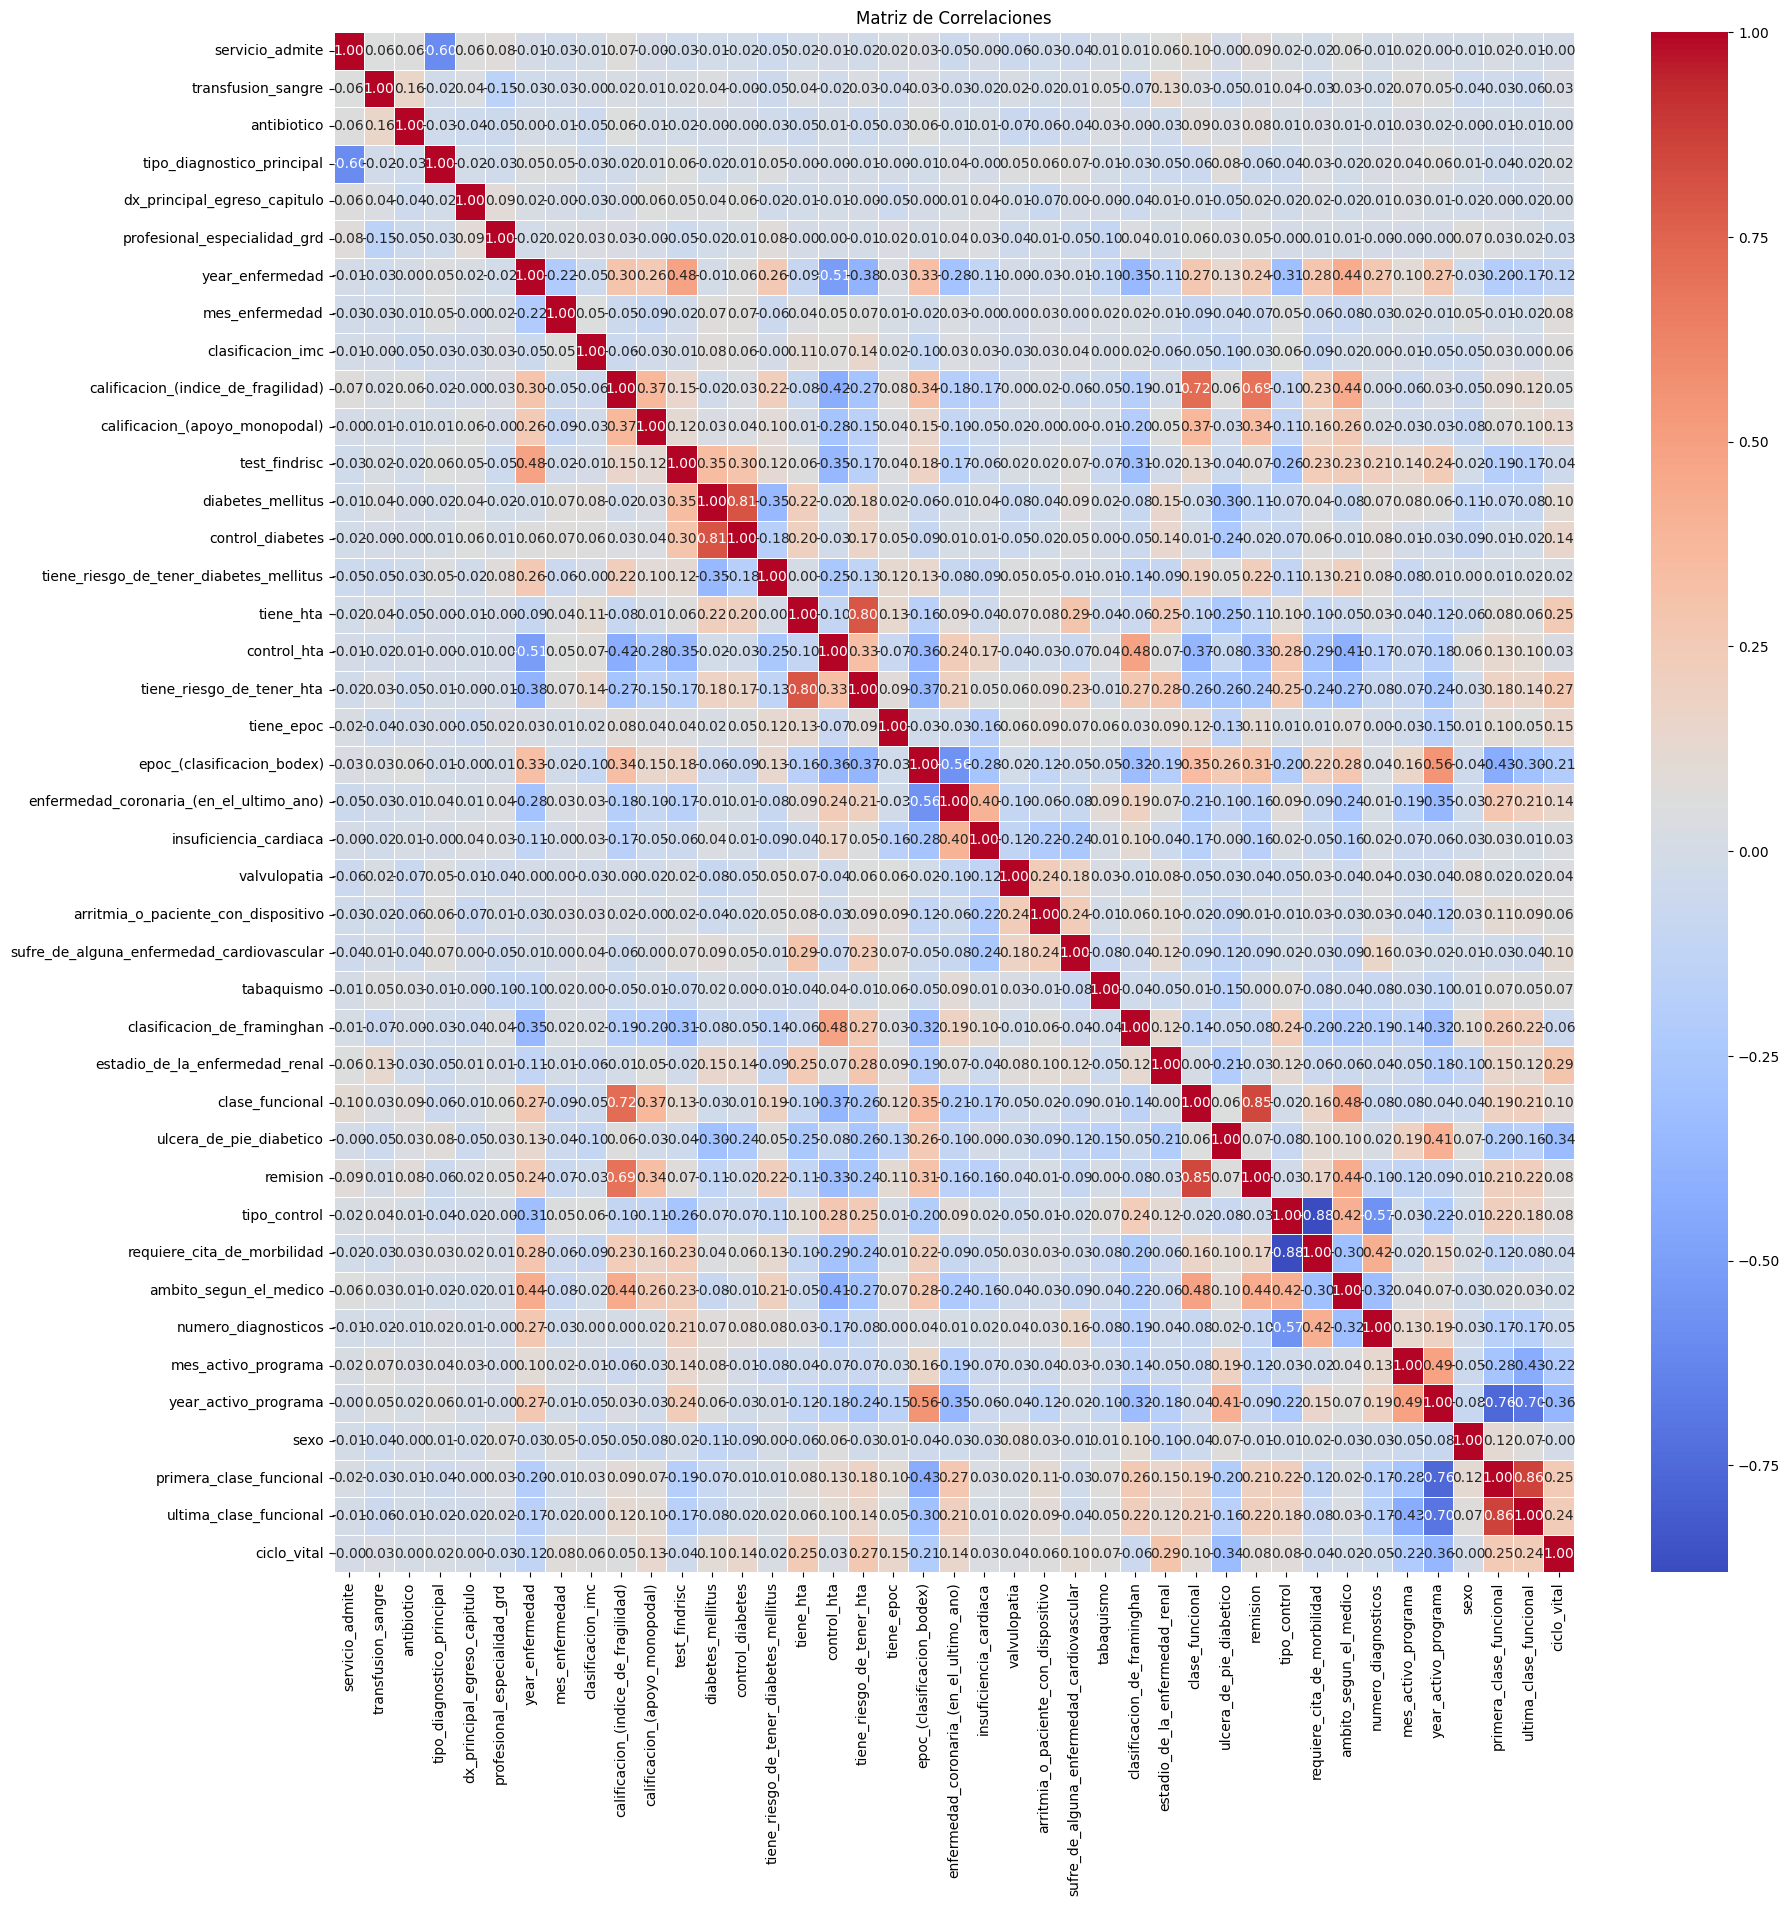

In [177]:
# Cálculo la matriz de correlaciones
correlation_matrix = cor_cat.corr()

# Creación de un mapa de calor (heatmap) para visualizar la matriz de correlaciones
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')

plt.show()

**HAY QUE FILTRAR LA REMISIÓN Y LUEGO ELIMINARLA**

Se decide eliminar las variables year_enfermedad, tiene_riesgo_de_tener_hta, tipo_control, primera_clase_funcional por tener alta correlación con otras variables

In [178]:
#Eliminación
categoricas = categoricas.drop(['calificacion_(indice_de_fragilidad)','diabetes_mellitus','servicio_admite', "year_enfermedad", "tiene_riesgo_de_tener_hta", "tipo_control", "primera_clase_funcional"],axis=1)

In [182]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   year_egreso                                1295 non-null   int64
 1   mes_egreso                                 1295 non-null   int64
 2   servicio_habilitado                        1295 non-null   int64
 3   nrodoc                                     1295 non-null   int64
 4   modalidad_contrato                         1295 non-null   int64
 5   via_ingreso                                1295 non-null   int64
 6   unidad_estrategica                         1295 non-null   int64
 7   tipo_egreso                                1295 non-null   int64
 8   fecha_ingreso_clinica                      1295 non-null   int64
 9   transfusion_sangre                         1295 non-null   int64
 10  antibiotico                                1295 

In [183]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   peso                                      1295 non-null   float64
 1   talla                                     1295 non-null   float64
 2   saturacion_de_oxigeno_(%)                 1295 non-null   float64
 3   presion_arterial_sistolica                1295 non-null   int64  
 4   presion_arterial_diastolica               1295 non-null   int64  
 5   frecuencia_cardiaca_en_reposo             1295 non-null   int64  
 6   vo2_-_maxima_cantidad_de_oxigeno          1295 non-null   float64
 7   indice_de_fragilidad_groningen            1295 non-null   float64
 8   glicemia                                  1295 non-null   float64
 9   hemoglobina_glicada                       1295 non-null   float64
 10  lipoproteina                        

**Concatenación BD final**

In [188]:
#BD final
df_sel = pd.concat([categoricas, numericas], axis=1)
df_sel

,year_egreso,mes_egreso,servicio_habilitado,nrodoc,modalidad_contrato,via_ingreso,unidad_estrategica,tipo_egreso,fecha_ingreso_clinica,transfusion_sangre,antibiotico,tipo_diagnostico_principal,dx_principal_egreso_capitulo,profesional_especialidad_grd,mes_enfermedad,clasificacion_imc,calificacion_(apoyo_monopodal),test_findrisc,control_diabetes,tiene_riesgo_de_tener_diabetes_mellitus,tiene_hta,control_hta,tiene_epoc,epoc_(clasificacion_bodex),enfermedad_coronaria_(en_el_ultimo_ano),insuficiencia_cardiaca,valvulopatia,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,clasificacion_de_framinghan,estadio_de_la_enfermedad_renal,clase_funcional,ulcera_de_pie_diabetico,remision,requiere_cita_de_morbilidad,ambito_segun_el_medico,numero_diagnosticos,mes_activo_programa,year_activo_programa,sexo,ultima_clase_funcional,ciclo_vital,peso,talla,saturacion_de_oxigeno_(%),presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca_en_reposo,vo2_-_maxima_cantidad_de_oxigeno,indice_de_fragilidad_groningen,glicemia,hemoglobina_glicada,lipoproteina,colesterol_total,trigliceridos,tasa_de_filtracion_glomerular_tfg,microalbuminuria,hormona_estimulante_de_la_tiroides_(tsh),cambio_de_tfg
0,0,3,2,323,0,1,1,0,0,0,0,1,1,17,10,2,0,0,2,4,0,1,1,3,4,3,0,0,0,1,0,2,2,0,1,0,0,0,0,0,0,5,2,74.0,154.0,97.0,129,55,71,14.3360,2.0,0.0,8.91,128.34,213.66,195.45,71.68,71.10,6.26,0.00
1,0,3,3,392,0,2,3,3,1,0,1,0,1,16,10,1,2,1,1,3,1,0,3,4,3,0,0,0,0,2,0,3,4,0,3,0,1,0,0,0,0,5,2,48.0,151.0,95.0,120,70,76,15.4403,7.0,0.0,0.00,0.00,146.00,145.00,48.69,0.00,0.00,0.00
2,0,3,2,197,0,1,1,0,2,0,0,1,1,17,2,3,2,2,3,3,0,1,1,1,4,3,0,0,0,1,1,4,2,0,1,1,0,1,0,0,0,5,2,70.5,156.0,95.0,174,78,73,7.1928,2.0,97.0,6.10,131.56,208.10,139.40,37.90,6.98,2.70,0.31
3,0,3,2,656,0,2,1,0,3,0,0,0,6,17,2,1,0,0,3,1,1,3,1,4,3,2,0,0,1,1,1,2,2,0,1,0,0,0,1,1,0,5,2,53.0,152.0,94.0,141,68,108,10.2557,1.0,0.0,7.15,61.00,141.00,123.00,61.54,18.47,0.00,0.00
4,0,3,2,337,0,2,1,0,4,0,0,0,7,3,8,3,2,2,3,3,1,0,3,4,3,0,0,0,0,1,1,5,4,0,3,2,1,1,0,0,0,5,2,70.0,162.0,94.0,110,70,74,10.2063,8.0,85.0,6.40,0.00,125.20,83.60,24.10,4.55,6.63,-0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0,2,2,472,0,2,1,0,1290,0,0,0,12,8,10,2,2,2,3,3,1,2,1,1,4,3,0,0,0,1,0,1,1,0,1,1,0,3,0,0,0,5,2,86.0,160.0,99.0,154,76,66,10.7789,2.0,86.0,5.84,39.85,133.30,115.80,95.73,0.46,0.65,1.45
1291,0,2,2,99,0,2,1,0,1291,0,0,0,6,17,2,1,2,0,1,3,1,0,3,1,4,0,0,0,1,1,1,4,4,0,3,1,1,1,0,0,1,5,2,66.0,165.0,97.0,110,70,62,18.7572,10.0,78.0,5.76,0.00,121.30,45.80,35.71,0.15,1.23,0.00
1292,0,2,4,208,0,2,3,0,1292,0,0,0,6,16,5,1,2,0,1,3,0,1,1,4,3,2,0,0,0,1,1,2,4,0,3,0,2,0,0,0,1,5,2,60.0,155.0,95.0,110,60,80,22.0328,8.0,78.0,6.13,0.00,168.00,120.00,89.74,1.10,0.68,0.00
1293,0,2,3,24,0,2,3,3,1293,0,0,0,1,16,2,1,2,0,3,3,1,0,1,4,3,2,0,0,0,1,0,4,4,0,3,0,2,0,0,0,0,5,2,51.0,150.0,96.0,125,71,133,11.6413,12.0,119.0,6.88,0.00,212.80,96.70,34.55,0.87,21.68,0.00


In [189]:
#Transformación BD final
scaler = MinMaxScaler()

scaler.fit(df_sel)

# Transformar los datos y almacenarlos en una nueva variable
df_sel_sc = scaler.transform(df_sel)

df_sel_sc= pd.DataFrame(df_sel_sc, columns=df_sel.columns)

#joblib.dump(scaler, 'scaler.pkl')

In [193]:
# Se convierte a CSV
df_sel_sc.to_csv('/content/drive/MyDrive/analitica3/Salud/df_sel.csv', index=True)
y.to_csv('/content/drive/MyDrive/analitica3/Salud/y.csv', index=True)